In [2]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from C:\Users\minet\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\minet\AppData\Local\Temp\tmpxo56ii3o
  JVM stdout: C:\Users\minet\AppData\Local\Temp\tmpxo56ii3o\h2o_Paul_started_from_python.out
  JVM stderr: C:\Users\minet\AppData\Local\Temp\tmpxo56ii3o\h2o_Paul_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_Paul_k247jv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.547 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
train, test = iris.split_frame ([0.8], seed=123)

In [15]:
print("%d/%d" % (train.nrows, test.nrows))

121/29


In [16]:
iris

sepal_len,sepal_wid,petal_len,petal_wid,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [17]:
train.nrow

121

In [18]:
x = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]

In [19]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [24]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh", #recommended for autoencoders
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
)
%time m_AE_4.train(x, None, train) #y is always none for autoencoder, unsupervised

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.39 s


In [25]:
sh = m_AE_4.score_history()
sh.head() #training mse is reconstruction error (how similar input 4 nodes are to output 4 nodes)

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-08-07 14:07:11,0.049 sec,0.00000 obs/sec,0.0,0,0.0,0.219676,0.048257
1,,2020-08-07 14:07:11,0.083 sec,3666 obs/sec,1.0,1,121.0,0.170881,0.029200
2,,2020-08-07 14:07:11,0.105 sec,6368 obs/sec,2.0,2,242.0,0.134022,0.017962
3,,2020-08-07 14:07:11,0.122 sec,6849 obs/sec,3.0,3,363.0,0.116222,0.013508
4,,2020-08-07 14:07:11,0.131 sec,8203 obs/sec,4.0,4,484.0,0.105574,0.011146


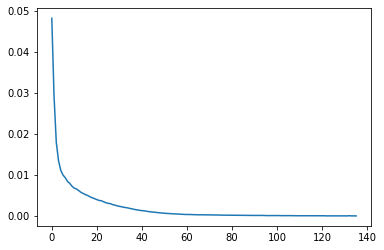

In [26]:
sh["training_mse"].plot()

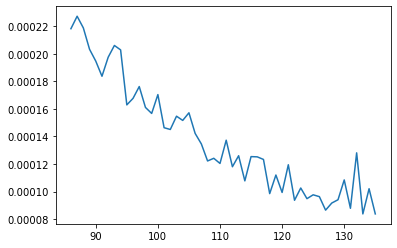

In [28]:
sh["training_mse"].tail(50).plot()

In [29]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh", #recommended for autoencoders
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15,
)
%time m_AE_4.train(x, None, train) #y is always none for autoencoder, unsupervised

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 2.12 s


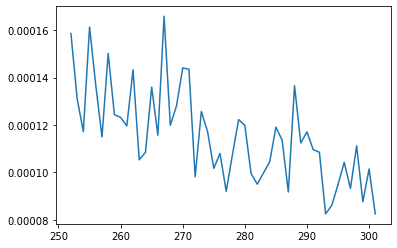

In [30]:
sh = m_AE_4.score_history()
sh["training_mse"].tail(50).plot()

In [41]:
#asking for 4 fields to compress to 3
m_AE_3 = H2OAutoEncoderEstimator(
    hidden = [3], #3 hidden neurons and only 1 layer, so autoencoders are quick to learn
    activation = "Tanh", #recommended for autoencoders
    epochs = 300,
    model_id = "m_AE_3",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15,
)
%time m_AE_3.train(x, None, train) #y is always none for autoencoder, unsupervised

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.16 s


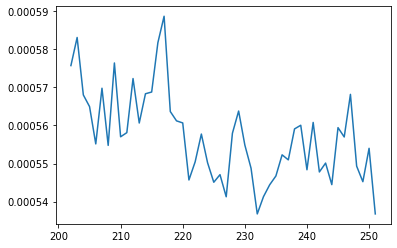

In [42]:
sh = m_AE_3.score_history()
sh["training_mse"].tail(50).plot()

3 is reasonable, see error as a fn of epochs on the top. 2 increases error. 

Multi-layer autoencoder

In [35]:
m_AE_5_3_5 = H2OAutoEncoderEstimator(
    hidden = [5, 3, 5], #4 input, 5 1st hidden layer, 3 2nd hidden layer, 5 3rd hidden layer, 4 output layer
    activation = "Tanh", #recommended for autoencoders
    epochs = 300,
    model_id = "m_AE_5_3_5",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15,
)
%time m_AE_5_3_5.train(x, None, train) #y is always none for autoencoder, unsupervised

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 486 ms


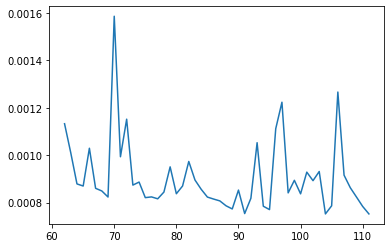

In [36]:
sh = m_AE_5_3_5.score_history()
sh["training_mse"].tail(50).plot()

Stack autoencoders together: learned one autoencoder at a time

In [43]:
train_AE_3 = m_AE_3.deepfeatures(train, 0) #0 means extract from layer 1

deepfeatures progress: |██████████████████████████████████████████████████| 100%


In [44]:
train_AE_3.dim

[121, 3]

In [45]:
train_AE_3 #This will be our new training data below

DF.L1.C1,DF.L1.C2,DF.L1.C3
-0.552243,0.0714201,0.298658
-0.468312,0.305055,0.318808
-0.501133,0.25179,0.366243
-0.473906,0.299833,0.372166
-0.565071,0.0414652,0.320706
-0.549294,-0.15709,0.254665
-0.496163,0.175016,0.392073
-0.530971,0.125239,0.309401
-0.583594,-0.0574722,0.243819
-0.522693,0.149086,0.341782


In [46]:
m_AE_3x3 = H2OAutoEncoderEstimator(
    hidden = [3], 
    activation = "Tanh", #recommended for autoencoders
    epochs = 300,
    model_id = "m_AE_3x3",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15,
)
%time m_AE_3x3.train([0,1,2], None, train_AE_3) #train_AE_3 is new training data

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 736 ms


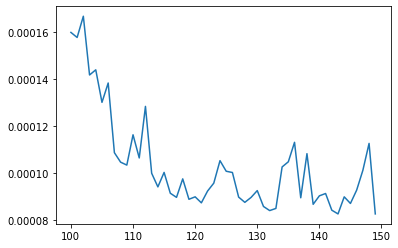

In [49]:
sh = m_AE_3x3.score_history()
sh["training_mse"].tail(50).plot() #the error below is reconstruction of the new train_AE_3 data, not original

Anomalies: no dimmension reduction, just learn from data

In [50]:
x = ["sepal_len", "sepal_wid", "petal_len", "petal_wid","class"]

In [51]:
m_anomaly16 = H2OAutoEncoderEstimator(
    hidden = [16], 
    activation = "Tanh", #recommended for autoencoders
    epochs = 300,
    model_id = "m_anomaly16",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15,
)
%time m_anomaly16.train(x, None, iris) #full data

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 982 ms


In [52]:
anomalies = m_anomaly16.anomaly(iris).cbind(iris).as_data_frame()

In [53]:
s = anomalies.sort_values("Reconstruction.MSE", ascending=False)

In [55]:
s.head() #Most anomalous to learn, hardest 5
s.tail() #Least anomalous to learn, most typical

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
17,0.000005,5.1,3.5,1.4,0.3,Iris-setosa
7,0.000004,5.0,3.4,1.5,0.2,Iris-setosa
0,0.000004,5.1,3.5,1.4,0.2,Iris-setosa
4,0.000003,5.0,3.6,1.4,0.2,Iris-setosa
97,0.000003,6.2,2.9,4.3,1.3,Iris-versicolor
